In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/sabah0312/ml-datasets/refs/heads/main/toydata-truncated.txt'
df = pd.read_csv(url, sep="\t")

df

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0
5,0.39,-1.99,0
6,-0.49,-2.74,0
7,-0.68,-1.52,0
8,-0.10,-3.43,0
9,-0.05,-1.95,0


In [2]:
X = df[['x1','x2']].values
y = df['label'].values

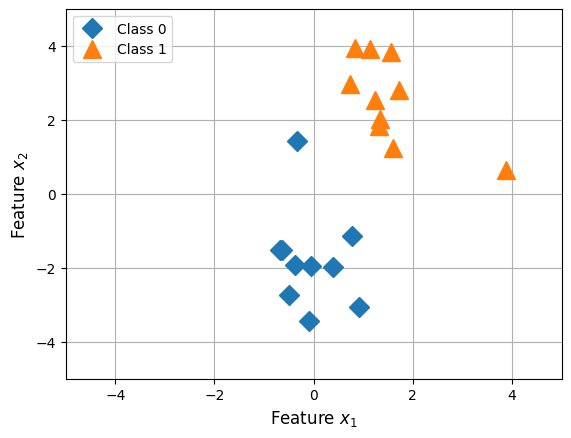

In [3]:
import matplotlib.pyplot as plt
plt.plot(
    X[y == 0, 0],
    X[y == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X[y == 1, 0],
    X[y == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

In [4]:
import torch
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1,1)

In [6]:
class LinearClassifier(torch.nn.Module):
  def __init__(self, num_features, learning_rate = 0.5):
    super().__init__()
    self.linear = torch.nn.Linear(num_features, 1)
    self.learning_rate = learning_rate
    self.optimizer = torch.optim.SGD(self.linear.parameters(), lr = learning_rate)
    self.loss_fn = torch.nn.BCEWithLogitsLoss()

  def forward(self, x):
    return self.linear(x)

  def predict(self,x):
    with torch.no_grad():
      z = self.forward(x)
      probability = torch.sigmoid(z)
      return probability > 0.5

  def update(self, x, y_true):
    predictions = self.forward(x)

    loss = self.loss_fn(predictions, y_true)

    self.optimizer.zero_grad()
    loss.backward()
    self.optimizer.step()
    return loss.item()

In [7]:
LC = LinearClassifier(num_features=2)

print(f"initial weights: {LC.linear.weight}")
print(f"initial bias : {LC.linear.bias}")
epoch_no = 150
for epoch in range(epoch_no):
  loss = LC.update(X, y)
  if epoch%10 == 0:
    print(f"epoch: {epoch}/ {epoch_no}, loss: {loss}")
print(f" weights: {LC.linear.weight}")
print(f" bias : {LC.linear.bias}")

initial weights: Parameter containing:
tensor([[-0.4380,  0.4000]], requires_grad=True)
initial bias : Parameter containing:
tensor([-0.4180], requires_grad=True)
epoch: 0/ 150, loss: 0.5529454350471497
epoch: 10/ 150, loss: 0.13056175410747528
epoch: 20/ 150, loss: 0.10808964818716049
epoch: 30/ 150, loss: 0.09413193166255951
epoch: 40/ 150, loss: 0.08336932957172394
epoch: 50/ 150, loss: 0.0746721476316452
epoch: 60/ 150, loss: 0.06750590354204178
epoch: 70/ 150, loss: 0.06151754781603813
epoch: 80/ 150, loss: 0.056451261043548584
epoch: 90/ 150, loss: 0.05211711674928665
epoch: 100/ 150, loss: 0.04837200790643692
epoch: 110/ 150, loss: 0.045107025653123856
epoch: 120/ 150, loss: 0.042237862944602966
epoch: 130/ 150, loss: 0.0396985299885273
epoch: 140/ 150, loss: 0.037436626851558685
 weights: Parameter containing:
tensor([[2.0260, 1.4879]], requires_grad=True)
 bias : Parameter containing:
tensor([-2.1768], requires_grad=True)


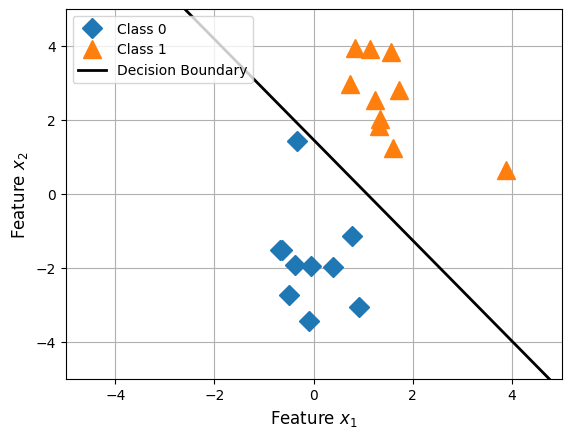

Decision boundary: 2.026*x1 + 1.488*x2 + -2.177 = 0


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Extract weights and bias
w1 = LC.linear.weight[0, 0].item()
w2 = LC.linear.weight[0, 1].item()
b = LC.linear.bias[0].item()

# Calculate decision boundary line
# Line equation: w1*x1 + w2*x2 + b = 0
# Solve for x2: x2 = -(w1*x1 + b) / w2

x1_min = -5
x1_max = 5
x2_min = -(w1 * x1_min + b) / w2
x2_max = -(w1 * x1_max + b) / w2

# Plot
plt.plot(
    X[y.squeeze() == 0, 0],
    X[y.squeeze() == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X[y.squeeze() == 1, 0],
    X[y.squeeze() == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k", linewidth=2, label="Decision Boundary")

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

print(f"Decision boundary: {w1:.3f}*x1 + {w2:.3f}*x2 + {b:.3f} = 0")